> 
# Project: Investigate a Dataset - [No-show appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**ScheduledDay** tells us on what day the patient set up their appointment.
**Neighborhood** indicates the location of the hospital.
**Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
**PatientId** is the identification number of the patient.
**AppointmentID** is the appointment id giving to the patient.
**Gender** the gender of the patient, either male or female.
**AppointmentDay** the appointment day set up for the patient.
**Diabetes** if the patient has diabetes or not.
**Hipertension** if the patient has been diagnosed of hipertension.
**Alcoholism** if the patient is addicted to Alcohol.
**SMS_recieved** tells us if the patient received SMS or not.
**No-show** indicates whether or not the patient showed up for their appointment or not.



### Question(s) for Analysis
>**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df =pd.read_csv('noshowappointments.csv')
App_df = df

In [3]:
# Print out few lines
App_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Inspect the data
App_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Remove negative from minimum age
App_df = App_df[App_df['Age']>0]

In [6]:
# Check if the negative has been removed
App_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Check for the no of rows and columns
App_df.shape

(106987, 14)

In [8]:
# Check for the informations
App_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106987 non-null float64
AppointmentID     106987 non-null int64
Gender            106987 non-null object
ScheduledDay      106987 non-null object
AppointmentDay    106987 non-null object
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hipertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handcap           106987 non-null int64
SMS_received      106987 non-null int64
No-show           106987 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [9]:
# Check for datatypes
App_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
# How many number of unique values are in each column
App_df.nunique()

PatientId          60270
AppointmentID     106987
Gender                 2
ScheduledDay      100307
AppointmentDay        27
Age                  102
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
# Check for duplicates in the data
sum(App_df.duplicated())

0


### Data Cleaning


In [12]:
#Since the AppointmentID is unique, we can drop it 

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
App_df.drop(['AppointmentID'], axis = 1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


After dropping the AppointmentId column, we use df.head() to check if it has been removed

In [14]:
App_df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
App_df = App_df.rename(columns = {'No-show':'No_show'})

The No-show column is being renamed to No_show to make it easier to use

In [16]:
App_df.No_show = App_df.No_show.replace({'Yes':1,'No':0})

Since the No_show column is used to know if a patient showed up or not and its datatype is an object we then change it to an integer 

In [17]:
# Check if the datatype of No_show has changed to an integer
App_df.dtypes

PatientId         float64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show             int64
dtype: object

In [18]:
App_df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,0.202641
std,2.558267e+14,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,0.401969
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [19]:
Show = App_df.No_show == 0
No_show = App_df.No_show == 1

In the No_show column yes means the patient did not show up which is 1 and No means the patient showed up for Appointment. Assign Show to 0 patients that showed up and No_show to 1 ,patients that did not showed up

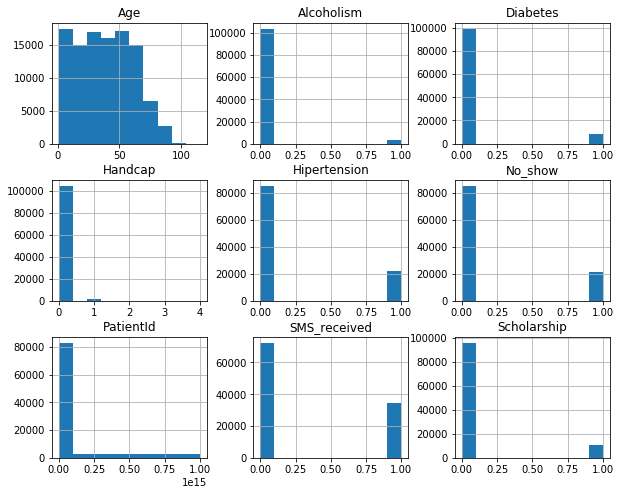

In [20]:
# Plot histogram for the entire dataframe to check
App_df.hist(figsize =(10,8));

In [21]:
App_df.Age[Show].mean()

39.075187264820002

In [22]:
App_df.Age[No_show].mean()

35.329151291512915

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Is Gender an important factor to predict if a patient will show up for Appointment


In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [24]:
# Check for the count of Gender
App_df.Gender.value_counts()

F    70118
M    36869
Name: Gender, dtype: int64

There are more Females than Males

In [25]:
def plot_labels(title, x, y):
    plt.title(title)
    plt.xlabel(x, fontsize = 18)
    plt.ylabel(y, fontsize = 18)
    plt.show()

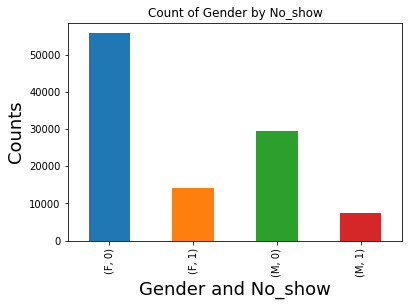

In [26]:
# Plot Gender against No_show
Gender_Noshow = App_df.groupby('Gender')['No_show'].value_counts()
Gender_Noshow.plot(kind='bar')
plot_labels('Count of Gender by No_show', 'Gender and No_show', 'Counts')

 From the Bar chart above we can see that there are more female patients who attend their appointment than male patients. But since the counts of females are more than the male, we can't use Gender as a factor to determine if Patients will show up for their appointments.

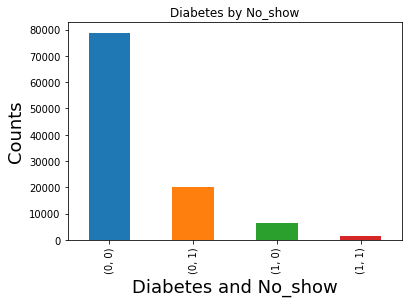

In [27]:
# Plot Diabetes against No_show
Diabetes_Noshow = App_df.groupby('Diabetes')['No_show'].value_counts()
Diabetes_Noshow.plot(kind='bar')
plot_labels('Diabetes by No_show', 'Diabetes and No_show', 'Counts')

Most of the patients that showed up dont have diabetes so diabetes isnt also a factor

### Research Question 2  (Is Age a factor to determine if a patient will show up or not?!)

In [28]:
#to check for the mean of age of people that showed up for their appointment
App_df.Age[Show].mean()

39.075187264820002

In [29]:
#to check for the mean of age of people that did not show up for their appointment
App_df.Age[No_show].mean()

35.329151291512915

From the answers above we can see that the mean age for the people that showed up is more than the mean age for people that did not show up.

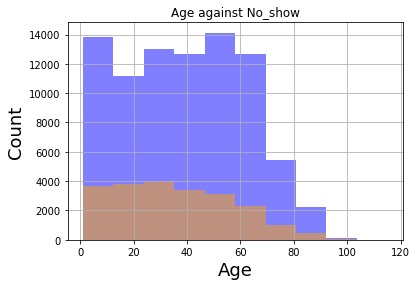

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
App_df.Age[Show].hist(alpha=0.5,bins = 10,color = 'blue',label ='Show')
App_df.Age[No_show].hist(alpha=0.5,bins = 10,color = 'orange',label ='No_Show')
plot_labels('Age against No_show', 'Age','Count')

From the graph above it can be deduced that people younger than 10 show up more than older ages

In [31]:
App_df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             0          60290
              1          12112
1             0          25017
              1           9568
Name: No_show, dtype: int64

If we try using SMS_received , we can see that people who did not receive sms showed up more than people who received sms

In [32]:
App_df.groupby('Hipertension')['No_show'].value_counts()

Hipertension  No_show
0             0          67278
              1          17908
1             0          18029
              1           3772
Name: No_show, dtype: int64

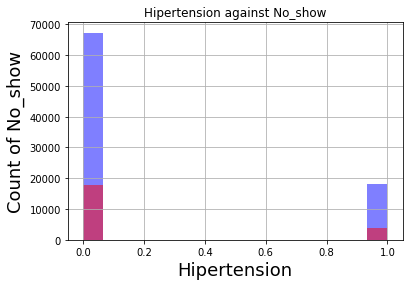

In [33]:
App_df.Hipertension[Show].hist(alpha=0.5,bins = 15, color = 'blue', label='Show')
App_df.Hipertension[No_show].hist(alpha=0.5,bins = 15,color = 'red', label = 'No_show')
plot_labels('Hipertension against No_show', 'Hipertension', 'Count of No_show')

Patients who dont have hipertension showed up more than patients who do

<a id='conclusions'></a>
## Conclusions

From the work above we can see that age is a factor to determine if a patient will show up and there are more females present than male....

As a limitation, we need to know that for a patient to show up it doesnt neccesarily depend on the location i.e the neighbourhood where the hospital is located or if the patient is on Schorlarship or not





In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0